In [16]:
import turicreate as tc

In [17]:
sales = tc.SFrame('house_data')

In [18]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


In [19]:
tc.show(sales[1:5000]['sqft_living'], sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Yksinkertainen regressio malli 

In [20]:
training_set, test_set = sales.random_split(.8, seed=0)

In [21]:
sqft_model = tc.linear_regression.create(training_set, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.009834     | 4348788.724300     | 1485494.606305       | 263457.471289                   | 252992.177895                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [22]:
print(test_set['price'].mean())

543054.0425632535


In [23]:
print(sqft_model.evaluate(test_set))

{'max_error': 4142965.1948015383, 'rmse': 255191.78760405973}


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

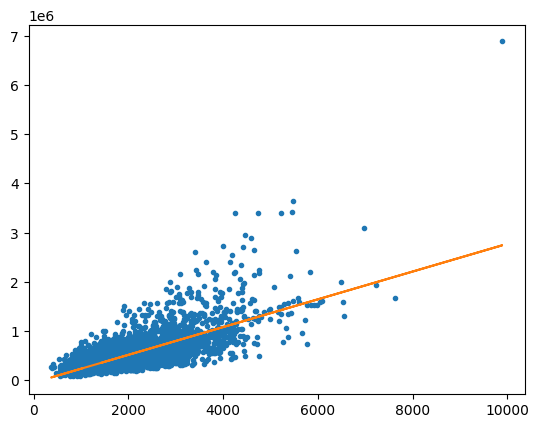

In [25]:
plt.plot(test_set['sqft_living'], test_set['price'], '.', 
         test_set['sqft_living'], sqft_model.predict(test_set), '-')

In [26]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-47203.75649466622,5053.881854569093
sqft_living,None,282.026143750569,2.2196532780109313


# Lisää ominaisuuksia

In [27]:
house_features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [28]:
sales[house_features].show()

Materializing SFrame

In [29]:
tc.show(sales['zipcode'], sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Rakennetaan regressio malli useammalla ominaisuudella

In [30]:
more_model = tc.linear_regression.create(training_set, target='price', features=house_features , validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.068588     | 4086543.315840     | 189216.804808                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [31]:
print(sqft_model.evaluate(test_set))
print(more_model.evaluate(test_set))

{'max_error': 4142965.1948015383, 'rmse': 255191.78760405973}
{'max_error': 3152242.7848689216, 'rmse': 180439.07296640836}


# Käytä opittua mallia 3 talon hinnan arvioimiseen

In [32]:
house1 = sales[sales['id']=='5309101200']

In [33]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [34]:
print(house1['price'])

[620000.0, ... ]


In [35]:
print(sqft_model.predict(house1))

[629658.9885066994]


In [36]:
print(more_model.predict(house1))

[729141.9396819177]


## Hienompi talo

In [37]:
house2 = sales[sales['id']=='1925069082']

In [38]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [39]:
print(sqft_model.predict(house2))

[1261397.550507974]


In [40]:
print(more_model.predict(house2))

[1232266.5096878982]


## Bill Gatesin talo

In [41]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [42]:
print(sqft_model.predict(tc.SFrame(bill_gates)))

[14054103.431033786]


In [43]:
print(more_model.predict(tc.SFrame(bill_gates)))

[15016529.988226764]


# Tehtävät

In [44]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [45]:
advanced_model = tc.linear_regression.create(training_set, target='price', features=advanced_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.010961     | 4336058.938763     | 162392.982702                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [46]:
print(sqft_model.predict(house1))
print(more_model.predict(house1))
print(advanced_model.predict(house1))

[629658.9885066994]
[729141.9396819177]
[657556.4643086968]


In [47]:
print(sqft_model.predict(house2))
print(more_model.predict(house2))
print(advanced_model.predict(house2))

[1261397.550507974]
[1232266.5096878982]
[1936531.8227118244]


In [48]:
print(sqft_model.predict(tc.SFrame(bill_gates)))
print(more_model.predict(tc.SFrame(bill_gates)))
print(advanced_model.predict(tc.SFrame(bill_gates)))

[14054103.431033786]
[15016529.988226764]
[12354687.478092032]


In [49]:
print(sqft_model.evaluate(test_set))
print(more_model.evaluate(test_set))
print(advanced_model.evaluate(test_set))

{'max_error': 4142965.1948015383, 'rmse': 255191.78760405973}
{'max_error': 3152242.7848689216, 'rmse': 180439.07296640836}
{'max_error': 3170363.181384935, 'rmse': 155269.65792801065}


In [69]:
filtered = sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] < 4000)]

In [71]:
filtered

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
1736800520,2015-04-03 00:00:00+00:00,662500.0,3.0,2.5,3560.0,9796.0,1.0,0
9297300055,2015-01-24 00:00:00+00:00,650000.0,4.0,3.0,2950.0,5000.0,2.0,0
2524049179,2014-08-26 00:00:00+00:00,2000000.0,3.0,2.75,3050.0,44867.0,1.0,0
7137970340,2014-07-03 00:00:00+00:00,285000.0,5.0,2.5,2270.0,6300.0,2.0,0
3814700200,2014-11-20 00:00:00+00:00,329000.0,3.0,2.25,2450.0,6500.0,2.0,0
1794500383,2014-06-26 00:00:00+00:00,937000.0,3.0,1.75,2450.0,2691.0,2.0,0
1873100390,2015-03-02 00:00:00+00:00,719000.0,4.0,2.5,2570.0,7173.0,2.0,0
8562750320,2014-11-10 00:00:00+00:00,580500.0,3.0,2.5,2320.0,3980.0,2.0,0
0461000390,2014-06-24 00:00:00+00:00,687500.0,4.0,1.75,2330.0,5000.0,1.5,0


In [73]:
sales['sqft_living']

dtype: float
Rows: 21613
[1180.0, 2570.0, 770.0, 1960.0, 1680.0, 5420.0, 1715.0, 1060.0, 1780.0, 1890.0, 3560.0, 1160.0, 1430.0, 1370.0, 1810.0, 2950.0, 1890.0, 1600.0, 1200.0, 1250.0, 1620.0, 3050.0, 2270.0, 1070.0, 2450.0, 1710.0, 2450.0, 1400.0, 1520.0, 2570.0, 2320.0, 1190.0, 2330.0, 1090.0, 2060.0, 2300.0, 1660.0, 2360.0, 1220.0, 2620.0, 2570.0, 4220.0, 3595.0, 1570.0, 1280.0, 3160.0, 990.0, 2290.0, 1250.0, 2753.0, 1190.0, 3150.0, 1410.0, 1980.0, 2730.0, 2830.0, 2250.0, 2420.0, 3250.0, 1850.0, 2150.0, 1260.0, 2519.0, 1540.0, 1660.0, 2770.0, 2720.0, 2240.0, 1000.0, 3200.0, 4770.0, 1260.0, 2750.0, 2380.0, 1790.0, 3430.0, 1760.0, 1040.0, 1410.0, 3450.0, 2350.0, 1900.0, 2020.0, 1680.0, 960.0, 2140.0, 2660.0, 2770.0, 1610.0, 1030.0, 1980.0, 3520.0, 1200.0, 1580.0, 1580.0, 3300.0, 1960.0, 1160.0, 1810.0, 2320.0, ... ]

In [74]:
filtered['sqft_living']

dtype: float
Rows: 9111
[2570.0, 3560.0, 2950.0, 3050.0, 2270.0, 2450.0, 2450.0, 2570.0, 2320.0, 2330.0, 2060.0, 2300.0, 2360.0, 2620.0, 2570.0, 3595.0, 3160.0, 2290.0, 2753.0, 3150.0, 2730.0, 2830.0, 2250.0, 2420.0, 3250.0, 2150.0, 2519.0, 2770.0, 2720.0, 2240.0, 3200.0, 2750.0, 2380.0, 3430.0, 3450.0, 2350.0, 2020.0, 2140.0, 2660.0, 2770.0, 3520.0, 3300.0, 2320.0, 2070.0, 2190.0, 2920.0, 2340.0, 3140.0, 2030.0, 2310.0, 2080.0, 3230.0, 2400.0, 2100.0, 2910.0, 2750.0, 2100.0, 2160.0, 2320.0, 2070.0, 2010.0, 3950.0, 2010.0, 2140.0, 2020.0, 2590.0, 2820.0, 2030.0, 3670.0, 2550.0, 2420.0, 2260.0, 3960.0, 2640.0, 2060.0, 3400.0, 2020.0, 2680.0, 2680.0, 2160.0, 3880.0, 2590.0, 2380.0, 2440.0, 3130.0, 2230.0, 2140.0, 2180.0, 2150.0, 2480.0, 2440.0, 2300.0, 2240.0, 2714.0, 3300.0, 2250.0, 3900.0, 2760.0, 2330.0, 2220.0, ... ]